#분류 분석 - 로지스틱 회귀 분석을 이용한 유방암 진단 프로젝트

### 1) 데이터 수집

In [1]:
import numpy as np
import pandas as pd
print(pd.__version__)

from sklearn.datasets import load_breast_cancer

2.2.2


In [2]:
b_cancer = load_breast_cancer() #유방암 진단 데이터셋을 사용하기 위해 사이킷런에서 제공하는 데이터셋 sklearn.datasets 중 load_breast_cancer 호출

### 2) 데이터 수집 및 탐색

In [3]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
#데이터셋 객체의 data 배열 b_cancer.data, 즉 독립 변수 X가 되는 피처를 DataFrame 자료형으로 변환하여 b_cancer_df를 생성
#b_cancer.feature_names 으로 Column 명을 지정
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

In [5]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#유방암 유무 class로 사용할 diagnosis 컬럼을 b_cancer_df에 추가하고 데이터셋 객체의 target 컬럼b_cancer.target을 저장
b_cancer_df['diagnosis']= b_cancer.target # diagnosis는 악성이면 1, 양성이면 0의 값이므로 유방암 여부에 대한 이진 분류의 class로 사용할 종속 변수가 됨

In [7]:
b_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
print('유방암 진단 데이터셋 크기 : ', b_cancer_df.shape)

유방암 진단 데이터셋 크기 :  (569, 31)


* 30개의 피처(독립 변수 X)  이름과 1개의 종속 변수 이름을 확인 가능
* diagnosis는 악성이면 1, 양성이면 0의 값이므로 유방암 여부에 대한 이진 분류의 class로 사용할 종속 변수가 됨


### 로지스틱 회귀 분석에 피처로 사용할 데이터를 평균이 0, 분산이 1이 되는 정규 분포 형태로 맞춤
* Feature scaling(normalization): 모든 변수들을 표준값 범위(0~1, -1~+1)사이의 값으로 조정하는 것, 기계학습 모델은 피쳐의 값으 범위가 비슷할때 빠르게 최적값으로 수렴
  - StandardScaler: 가우시안 정규 분포를 가질 수 있도록 데이터를 변환한다.
  모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환된다.
  - MinMaxScaler: 데이터의 분포가 가우시안 분포가 아닐 경우에는 Min, Max Scale을 적용해 볼 수 있다. 일반적으로 데이터값을 0과 1사이의 범위 값으로 변환하는데, 원본 데이터값에 음수가 있을 경우 -1에서 1값으로 변환한다.

In [11]:
#사이킷런의 전처리 패키지에 있는 정규 분포 스케일러를 임포트하고 사용할 객체scaler를 생성
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
#피처로 사용할 데이터b_cancer.data에 대해 정규 분포 스케일링을 수행scaler.fit_ transform( )하여 b_cancer_scaled에 저장
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [13]:
#정규 분포 스케일링 후에 값이 조정된 것을 확인
print(b_cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [14]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


### 3) 분석 모델 구축 : 로지스틱 회귀를 이용한 이진 분류 모델

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# X, Y 설정하기
# diagnosis를 Y, 정규 분포로 스케일링한 b_cancer_scaled를 X로 설정
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled

In [17]:
# 훈련용 데이터와 평가용 데이터 분할하기
# 전체 데이터 샘플 569개를 학습 데이터:평가 데이터=7:3으로 분할 (test_size=0.3함)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
# 로지스틱 회귀 분석 : (1)모델 생성
# 로지스틱 회귀 분석 모델 객체 lr_b_cancer를 생성
lr_b_cancer = LogisticRegression()

In [19]:
# 로지스틱 회귀 분석 : (2)모델 훈련
# 학습 데이터X_train, Y_train로 모델 학습을 수행 fit( )함
lr_b_cancer.fit(X_train, Y_train)

LogisticRegression()

- 로지스틱 회귀는 이진 분류 문제를 해결하기 위해 널리 사용되는 알고리즘으로, 목표 변수 y가 두 개의 클래스 중 하나를 가질 때 사용

- 주요 매개변수
  - penalty: 사용될 규제의 종류를 지정합니다. 기본값은 'l2'이며, 'l1', 'elasticnet', 'none' 등을 사용할 수 있습니다.
  - C: 규제 강도를 제어하는 매개변수입니다. 값이 작을수록 강한 규제를 의미합니다. 기본값은 1.0입니다.
  - solver: 최적화 알고리즘을 지정합니다. 가능한 값으로는 'liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag' 등이 있습니다. 기본값은 'lbfgs'입니다.
  - max_iter: 최대 반복 횟수입니다. 기본값은 100입니다.
  - random_state: 재현성을 위해 난수 시드를 설정합니다.
- 주요 메서드
  - fit(X, y): 데이터 X와 레이블 y를 사용하여 모델을 학습시킵니다.
  - predict(X): 학습된 모델을 사용하여 데이터 X의 예측을 수행합니다.
  - predict_proba(X): 각 클래스에 대한 예측 확률을 반환합니다.
  - score(X, y): 데이터 X와 레이블 y에 대한 모델의 정확도를 반환합니다.
  - get_params(): 모델의 매개변수를 반환합니다.
  - set_params(**params): 모델의 매개변수를 설정합니다.

In [20]:
# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
# 학습이 끝난 모델에 대해 평가 데이터 X_test를 가지고 예측을 수행
# predict( )하여 예측값 Y_predict를 구함
Y_predict = lr_b_cancer.predict(X_test)

### 4) 결과 분석

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [22]:
# 오차 행렬
# 평가를 위해 7:3으로 분할한 171개의 test 데이터에 대해 이진 분류의 성능 평가 기본이 되는 오차 행렬을 구함
# 실행 결과를 보면 TN이 60개, FP가 3개, FN이 1개, TP가 107개인 오차 행렬이 구해짐
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]])

In [23]:
# 성능 평가 지표인 정확도(Accurcy), 정밀도(Precision), 재현율(recall), F1 스코어, ROC-AUC 스코어를 구함
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

In [24]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


In [25]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


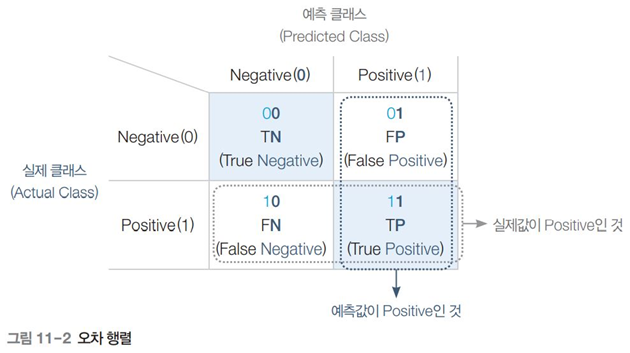

* Accuracy (정확도) =  (TP + TN) / (TP + TN + FP + FN)
* Precision (정밀도) = TP / (TP + FP)
* Recall (재현율) = TP / (TP + FN)
* F1 = (2 * Precision * Recall) / (Precision + Recall)